# Aprendizaje automático con Scikit-Learn: máquinas vectoriales de soporte

## Importaciones

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

## Máquinas de vectores de soporte y su uso en problemas de clasificación.

Las máquinas de vectores de soporte (SVM) son una clase particularmente poderosa y flexible de algoritmos supervisados tanto para clasificación como para regresión.
En esta sección, desarrollaremos la intuición detrás de las máquinas de vectores de soporte y su uso en problemas de clasificación.

In [2]:

plt.style.use('seaborn')

# Motivating Support Vector Machines

Considere el caso simple de una tarea de clasificación, en la que las dos clases de puntos están bien separadas:

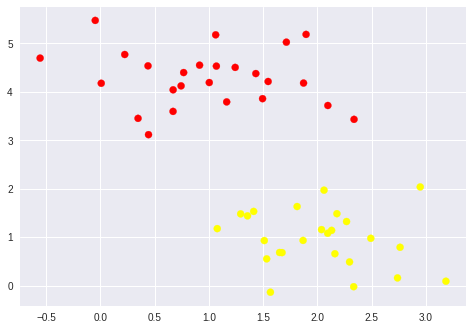

In [6]:
#from sklearn.datasets.samples_generator import make_blobs
from sklearn.datasets import make_blobs

#La función make_blobs () se puede utilizar para generar manchas de puntos con una distribución gaussiana

X, y = make_blobs(n_samples=50, centers=2,
                  random_state=0, cluster_std=0.60)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn');

Un método sencillo de clasificación es intentar trazar una línea recta entre los dos grupos de puntos; esto se conoce como *clasificador lineal discriminativo*.

Para datos bidimensionales como los que se muestran aquí, esta es una tarea que podríamos hacer a mano.

Pero, inmediatamente vemos un problema: ¡hay más de una línea divisoria posible que puede discriminar perfectamente entre las dos clases!

Podríamos dibujarlos de la siguiente manera:

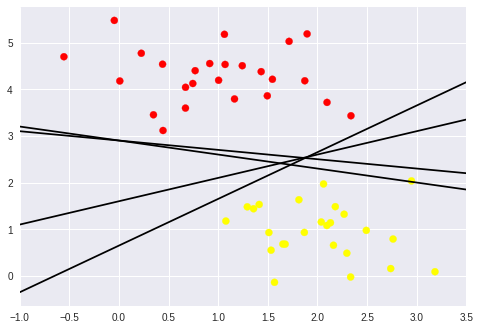

In [9]:
xfit = np.linspace(-1, 3.5)
# scatter: Genera un diagrama de dispersión de y frente a x con diferentes tamaños y colores de marcador.
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

for m, b in [(1, 0.65), (0.5, 1.6), (-0.2, 2.9),(-0.3,2.9)]:
    # ecuación ordinaria de la recta y = mx + b
    plt.plot(xfit, m * xfit + b, '-k')

plt.xlim(-1, 3.5);

Se trata de tres separadores *muy* diferentes que, sin embargo, discriminan perfectamente entre estas muestras.
Dependiendo de lo que elija, a un nuevo punto de datos se le asignará una etiqueta diferente:

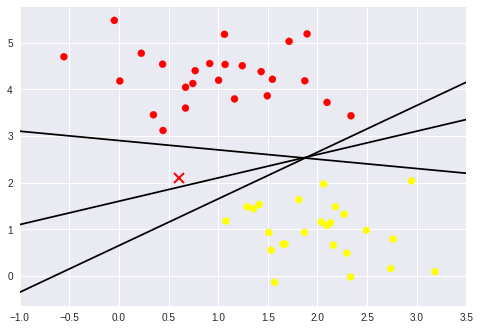

In [ ]:
xfit = np.linspace(-1, 3.5)
# scatter: Genera un diagrama de dispersión de y frente a x con diferentes tamaños y colores de marcador
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
# agregar un nuevo punto en el mapa
plt.plot([0.6], [2.1], 'x', color='red', markeredgewidth=2, markersize=10)

for m, b in [(1, 0.65), (0.5, 1.6), (-0.2, 2.9)]:
    # ecuación ordinaria de la recta y = mx + b
    plt.plot(xfit, m * xfit + b, '-k')

plt.xlim(-1, 3.5);

Evidentemente, nuestra simple intuición de "trazar una línea divisoria entre clases" no es suficiente, y necesitamos pensar un poco más.

# Máquinas de vectores de soporte: maximización del margen

Las máquinas de vectores de soporte ofrecen una forma de mejorar esto.
La idea es esta: en lugar de simplemente dibujar una línea de ancho cero entre las clases, podemos dibujar alrededor de cada línea un *margen* de algún ancho, hasta el punto más cercano.
A continuación, se muestra un ejemplo de cómo podría verse esto:

(-1.0, 3.5)

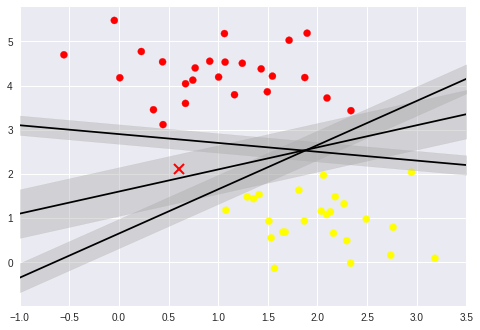

In [10]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

plt.plot([0.6], [2.1], 'x', color='red', markeredgewidth=2, markersize=10)

#gráficas
for m, b, d in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.22)]:
    # ecuación ordinaria de la recta y = mx + b
    yfit = m * xfit + b
    plt.plot(xfit, yfit, '-k')
    # dibujo del margen de cada uno de estos ejes
    plt.fill_between(xfit, yfit - d, yfit + d, edgecolor='none', color='#AAAAAA', alpha=0.4)

plt.xlim(-1,3.5)

En máquinas de vectores de soporte, la línea que maximiza este margen es la que elegiremos como modelo óptimo.
Las máquinas de vectores de soporte son un ejemplo de un estimador de *margen máximo* de este tipo.

## Montado de una máquina de vectores de soporte

Veamos el resultado de un ajuste real a estos datos: utilizaremos el clasificador de vectores de soporte de scikit-learn para entrenar un modelo SVM sobre estos datos.
Por el momento, usaremos un kernel lineal y estableceremos el parámetro ***C*** en un número muy grande (discutiremos el significado de estos con más profundidad momentáneamente):

In [11]:
from sklearn.svm import SVC # "Support vector classifier"
model = SVC(kernel='linear', C=1E10)
# X, y modelo de distribución gaussiana
model.fit(X, y)

SVC(C=10000000000.0, kernel='linear')

Para visualizar mejor lo que está sucediendo aquí, creemos una función de conveniencia rápida que trazará los límites de decisión de SVM para nosotros:

In [12]:
def plot_svc_decision_function(model, ax=None, plot_support=True):
           """Plot the decision function for a two-dimensional SVC"""
           if ax is None:
               ax = plt.gca()
           xlim = ax.get_xlim()
           ylim = ax.get_ylim()

           # create grid to evaluate model
           x = np.linspace(xlim[0], xlim[1], 30)
           y = np.linspace(ylim[0], ylim[1], 30)
           Y, X = np.meshgrid(y, x)
           xy = np.vstack([X.ravel(), Y.ravel()]).T
           P = model.decision_function(xy).reshape(X.shape)

           # plot decision boundary and margins
           ax.contour(X, Y, P, colors='k',
                      levels=[-1, 0, 1], alpha=0.5,
                      linestyles=['--', '-', '--'])

           # plot support vectors
           if plot_support:
               ax.scatter(model.support_vectors_[:, 0],
                          model.support_vectors_[:, 1],
                          s=300, linewidth=1, facecolors='none');
           ax.set_xlim(xlim)
           ax.set_ylim(ylim)

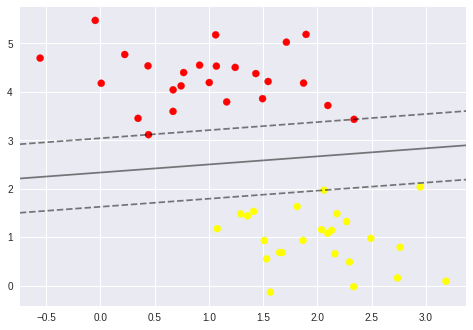

In [13]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(model);

Ésta es la línea divisoria que maximiza el margen entre los dos conjuntos de puntos.

Observe que algunos de los puntos de entrenamiento solo tocan el margen: están indicados por los círculos negros en esta figura.

Estos puntos son los elementos fundamentales de este ajuste, y se conocen como * vectores de soporte *, y dan nombre al algoritmo.

En scikit-learn, la identidad de estos puntos se almacena en el atributo ``support_vectors`` del clasificador:

In [14]:
model.support_vectors_

array([[0.44359863, 3.11530945],
       [2.33812285, 3.43116792],
       [2.06156753, 1.96918596]])

Una clave del éxito de este clasificador es que para el ajuste, solo importa la posición de los vectores de soporte; ¡Cualquier punto más alejado del margen que esté en el lado correcto no modifica el ajuste!
Técnicamente, esto se debe a que estos puntos no contribuyen a la función de pérdida utilizada para ajustar el modelo, por lo que su posición y número no importan siempre que no crucen el margen.

Podemos ver esto, por ejemplo, si graficamos el modelo aprendido de los primeros 60 puntos y los primeros 120 puntos de este conjunto de datos:

In [15]:
def plot_svm(N=10, ax=None):
      X, y = make_blobs(n_samples=200, centers=2,
                        random_state=0, cluster_std=0.60)
      X = X[:N]
      y = y[:N]
      model = SVC(kernel='linear', C=1E10)
      model.fit(X, y)

      ax = ax or plt.gca()
      ax.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
      ax.set_xlim(-1, 4)
      ax.set_ylim(-1, 6)
      plot_svc_decision_function(model, ax)

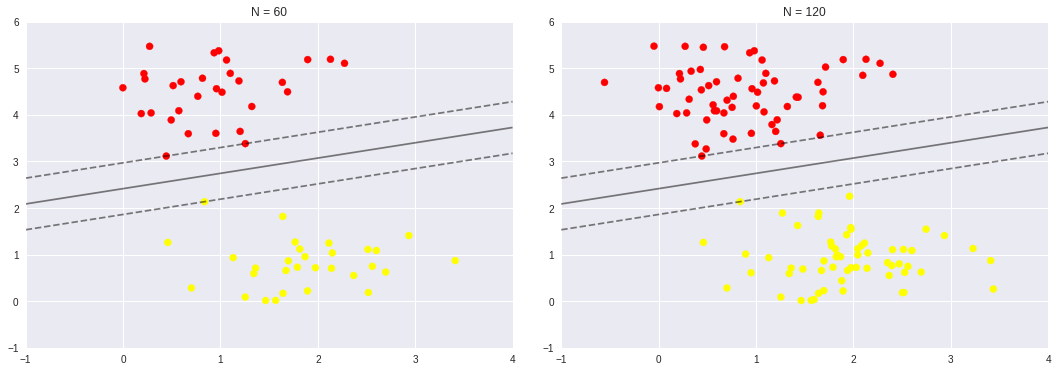

In [16]:
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)
for axi, N in zip(ax, [60, 120]):
    plot_svm(N, axi)
    axi.set_title('N = {0}'.format(N))

En el panel de la izquierda vemos el modelo y los vectores de soporte para 60 puntos de entrenamiento.
En el panel derecho, hemos duplicado el número de puntos de entrenamiento, pero el modelo no ha cambiado: los tres vectores de apoyo del panel izquierdo siguen siendo los vectores de apoyo del panel derecho.
Esta insensibilidad al comportamiento exacto de puntos distantes es uno de los puntos fuertes del modelo SVM.

In [17]:
from ipywidgets import interact, fixed
interact(plot_svm, N=(10, 200), ax=fixed(None));

interactive(children=(IntSlider(value=10, description='N', max=200, min=10), Output()), _dom_classes=('widget-…

## Más allá de los límites lineales: Kernel SVM

SVM se vuelve extremadamente poderoso cuando se combina con *kernels*. Para motivar la necesidad de kernels, veamos algunos datos que no se pueden separar linealmente:

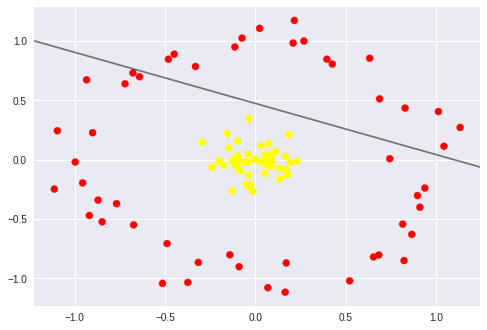

In [18]:
#from sklearn.datasets.samples_generator import make_circles
from sklearn.datasets import make_circles
X, y = make_circles(100, factor=.1, noise=.1)

clf = SVC(kernel='linear').fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf, plot_support=False);



### ¿Y aquí como hago lineaaaaaaaaas? :c

Está claro que *jamás* ninguna discriminación lineal   podrá separar estos datos.
Pero podemos pensar en cómo podríamos proyectar los datos en una dimensión superior de modo que un separador lineal *sería* suficiente.

Por ejemplo, una proyección simple que podríamos usar sería calcular una *función de base radial* centrada en el grupo del medio:

In [19]:
r = np.exp(-(X ** 2).sum(1))

Podemos visualizar esta dimensión de datos adicional usando un gráfico tridimensional; si está ejecutando este cuaderno en vivo, podrá usar los controles deslizantes para rotar el gráfico:

In [20]:
from mpl_toolkits import mplot3d

def plot_3D(elev=30, azim=30, X=X, y=y):
    ax = plt.subplot(projection='3d')
    ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=50, cmap='autumn')
    ax.view_init(elev=elev, azim=azim)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('r')

# Filtrando warnings distractores from ipywidgets
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

interact(plot_3D, elev=(0, 90), azip=(-180, 180),
         X=fixed(X), y=fixed(y));

interactive(children=(IntSlider(value=30, description='elev', max=90), IntSlider(value=30, description='azim',…

En el gráfico anterior, podemos ver que con esta dimensión adicional, los datos se vuelven trivial y linealmente separables, dibujando un plano de separación en, digamos, *r* = 0.7.

Aquí, tuvimos que elegir y ajustar cuidadosamente nuestra proyección: si no hubiéramos centrado nuestra función de base radial en la ubicación correcta, no hubiéramos visto resultados tan limpios y linealmente separables.
En general, la necesidad de hacer tal elección es un problema: nos gustaría de alguna manera encontrar automáticamente las mejores funciones de base para usar.

Una estrategia para este fin es calcular una función base centrada en *cada* punto del conjunto de datos y dejar que el algoritmo SVM revise los resultados.

Este tipo de transformación de función de base se conoce como * transformación de kernel *, ya que se basa en una relación de similitud (o kernel) entre cada par de puntos.

Un problema potencial con esta estrategia, proyectar _N_ puntos en _N_ dimensiones, es que podría volverse muy intensiva en computación a medida que _N_ crece.

Sin embargo, debido a un pequeño y prolijo procedimiento conocido como <a href="https://en.wikipedia.org/wiki/Kernel_trick" target="_blank"> *truco del kernel*</a>, un ajuste en el kernel- 

Los datos transformados se pueden hacer implícitamente, es decir, ¡sin construir la representación _N_ dimensional completa de la proyección del núcleo!

Este truco del kernel está integrado en SVM y es una de las razones por las que el método es tan poderoso.

En scikit-learn, podemos aplicar SVM kernelizado simplemente cambiando nuestro kernel lineal a un kernel RBF (función de base radial), usando el hiperparámetro del modelo ``kernel``:

In [21]:
clf = SVC(kernel='rbf', C=1E6)
clf.fit(X, y)

SVC(C=1000000.0)

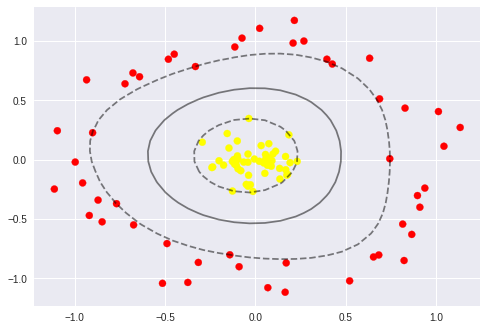

In [22]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=300, lw=1, facecolors='none');

Usando esta máquina de vectores de soporte kernelizada, aprendemos un límite de decisión no lineal adecuado.
Esta estrategia de transformación del kernel se usa a menudo en el aprendizaje automático para convertir métodos lineales rápidos en métodos no lineales rápidos, especialmente para modelos en los que se puede usar el truco del kernel.

## Ajuste de la SVM: márgenes de ablandamiento

Hasta ahora, nuestra discusión se ha centrado en conjuntos de datos muy limpios, en los que existe un límite de decisión perfecto.
Pero, ¿qué pasa si sus datos tienen cierta superposición?

Por ejemplo, puede tener datos como este:

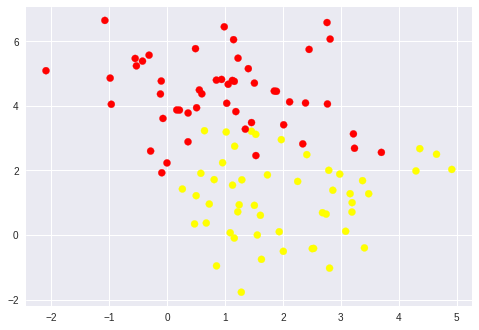

In [23]:
X, y = make_blobs(n_samples=100, centers=2,
                  random_state=0, cluster_std=1.2)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn');

Para manejar este caso, la implementación de SVM tiene un factor un poco fudge que "suaviza" el margen: es decir, permite que algunos de los puntos se introduzcan en el margen si eso permite un mejor ajuste.
La dureza del margen se controla mediante un parámetro de ajuste, más a menudo conocido como _C_.
Para _C_ muy grande, el margen es duro y los puntos no pueden estar en él.
Para _C_ más pequeños, el margen es más suave y puede crecer para abarcar algunos puntos.

El siguiente gráfico muestra cómo un parámetro _C_ cambiante afecta el ajuste final, a través del ablandamiento del margen:

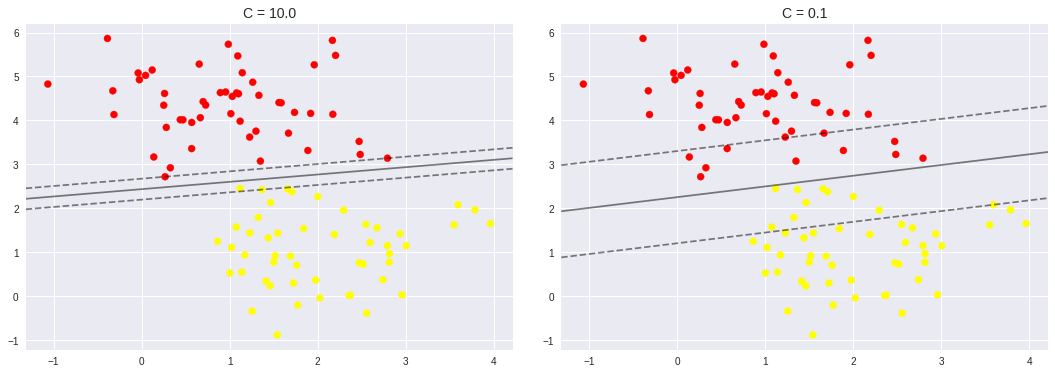

In [24]:
X, y = make_blobs(n_samples=100, centers=2,
                  random_state=0, cluster_std=0.8)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

for axi, C in zip(ax, [10.0, 0.1]):
    model = SVC(kernel='linear', C=C).fit(X, y)
    axi.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    plot_svc_decision_function(model, axi)
    axi.scatter(model.support_vectors_[:, 0],
                model.support_vectors_[:, 1],
                s=300, lw=1, facecolors='none');
    axi.set_title('C = {0:.1f}'.format(C), size=14)

El valor óptimo del parámetro _C_ dependerá de su conjunto de datos y debe ajustarse mediante validación cruzada o un procedimiento similar (consulte _Aprendizaje automático con Scikit-Learn: hiperparámetros y validación de modelos_).

# Ejemplo de SVM: reconocimiento facial

Como ejemplo de máquinas de vectores de soporte en acción, echemos un vistazo al problema del reconocimiento facial.
Usaremos el conjunto de datos de Caras etiquetadas en la naturaleza, que consta de varios miles de fotos recopiladas de varias figuras públicas.
Un buscador para el conjunto de datos está integrado en scikit-learn:

In [25]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=60)

In [ ]:
print(faces.target_names)
print(faces.images.shape)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
(1348, 62, 47)


Tracemos algunas de estas caras para ver con qué estamos trabajando:

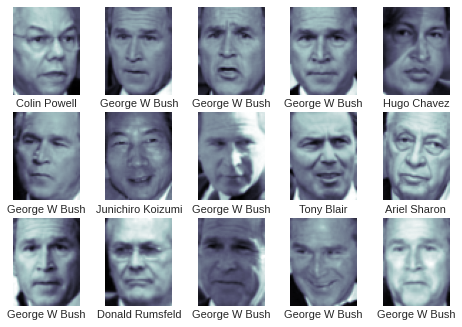

In [26]:
fig, ax = plt.subplots(3, 5)
for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[i], cmap='bone')
    axi.set(xticks=[], yticks=[],
            xlabel=faces.target_names[faces.target[i]])

Cada imagen contiene [62 × 47] o casi 3000 píxeles.
Podríamos proceder simplemente usando cada valor de píxel como una característica, pero a menudo es más efectivo usar algún tipo de preprocesador para extraer características más significativas. 

Aquí utilizaremos una técnica de reducción de dimensionalidad conocida como Análisis de componentes principales (consulte el <a href="https://jakevdp.github.io/PythonDataScienceHandbook/05.09-principal-component-analysis.html" target="_blank"> Principal Análisis de componentes </a> del _Python Data Science Handbook_ para obtener más detalles) para extraer 150 componentes fundamentales y alimentarlos con nuestro clasificador de máquinas de vectores de soporte.

Podemos hacer esto de la manera más sencilla empaquetando el preprocesador y el clasificador en un solo pipeline:

In [27]:
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline

pca = PCA(n_components=150, svd_solver='randomized', whiten=True, random_state=42)
svc = SVC(kernel='rbf', class_weight='balanced')
model = make_pipeline(pca, svc)

Con el fin de probar la salida de nuestro clasificador, dividiremos los datos en un conjunto de entrenamiento y prueba:

In [28]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(faces.data, faces.target,
                                                random_state=42)

Finalmente, podemos usar una validación cruzada de búsqueda de cuadrícula para explorar combinaciones de parámetros.
Aquí ajustaremos `` C ``  (que controla la dureza del margen) y ``gamma`` (que controla el tamaño del kernel de la función de base radial), y determinaremos el mejor modelo:

In [29]:
from sklearn.model_selection import GridSearchCV
param_grid = {'svc__C': [1, 5, 10,20, 30, 50],
              'svc__gamma': [0.0001, 0.0005, 0.001, 0.001, 0.001, 0.005]}
grid = GridSearchCV(model, param_grid)

%time grid.fit(Xtrain, ytrain)
print(grid.best_params_)

CPU times: user 2min 1s, sys: 1min 24s, total: 3min 26s
Wall time: 1min 51s
{'svc__C': 10, 'svc__gamma': 0.001}


Los valores óptimos caen hacia el medio de nuestra cuadrícula; si cayeran en los bordes, querríamos expandir la cuadrícula para asegurarnos de haber encontrado el verdadero óptimo.

Ahora, con este modelo de validación cruzada, podemos predecir las etiquetas de los datos de prueba, que el modelo aún no ha visto:

In [30]:
model = grid.best_estimator_
yfit = model.predict(Xtest)

Echemos un vistazo a algunas de las imágenes de prueba junto con sus valores predecidos:

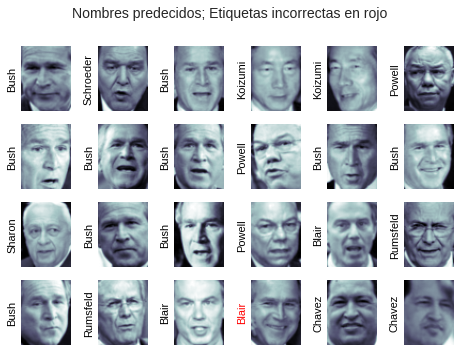

In [31]:
fig, ax = plt.subplots(4, 6)
for i, axi in enumerate(ax.flat):
    axi.imshow(Xtest[i].reshape(62, 47), cmap='bone')
    axi.set(xticks=[], yticks=[])
    axi.set_ylabel(faces.target_names[yfit[i]].split()[-1],
                   color='black' if yfit[i] == ytest[i] else 'red')
fig.suptitle('Nombres predecidos; Etiquetas incorrectas en rojo', size=14);

De esta pequeña muestra, nuestro estimador óptimo etiquetó erróneamente solo una cara (la de Bush, la cara de la fila inferior estaba mal etiquetada como Blair).
Podemos tener una mejor idea del rendimiento de nuestro estimador utilizando el informe de clasificación, que enumera las estadísticas de recuperación etiqueta por etiqueta:

In [32]:
from sklearn.metrics import classification_report
print(classification_report(ytest, yfit,
                            target_names=faces.target_names))

                   precision    recall  f1-score   support

     Ariel Sharon       0.65      0.73      0.69        15
     Colin Powell       0.80      0.87      0.83        68
  Donald Rumsfeld       0.74      0.84      0.79        31
    George W Bush       0.92      0.83      0.88       126
Gerhard Schroeder       0.86      0.83      0.84        23
      Hugo Chavez       0.93      0.70      0.80        20
Junichiro Koizumi       0.92      1.00      0.96        12
       Tony Blair       0.85      0.95      0.90        42

         accuracy                           0.85       337
        macro avg       0.83      0.84      0.84       337
     weighted avg       0.86      0.85      0.85       337



También podríamos mostrar la matriz de confusión entre estas clases:

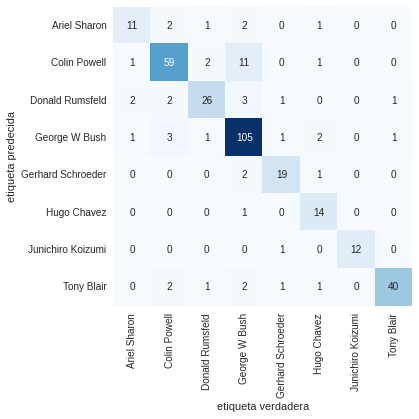

In [33]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

mat = confusion_matrix(ytest, yfit)
sns.heatmap(mat.T, square=True, annot=True, fmt='d',
            cmap='Blues', cbar=False,
            xticklabels=faces.target_names,
            yticklabels=faces.target_names)
plt.xlabel('etiqueta verdadera')
plt.ylabel('etiqueta predecida');

Esto nos ayuda a tener una idea de qué etiquetas es probable que el estimador confunda.

Para una tarea de reconocimiento facial del mundo real, en la que las fotos no vienen recortadas en cuadrículas agradables, la única diferencia en el esquema de clasificación facial es la selección de características: necesitaría usar un algoritmo más sofisticado para encontrar las caras y extraer características que son independientes de la pixelación.
Para este tipo de aplicación, una buena opción es utilizar <a href="http://opencv.org" target="_blank"> OpenCV </a>, que, entre otras cosas, incluye implementaciones de estado -Herramientas de extracción de características de última generación para imágenes en general y rostros en particular.